<a href="https://colab.research.google.com/github/AnujaWagh/Applied-Data-Programming-Bank-Dataset/blob/master/6680408_Anuja_Bhagwan_Wagh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1**

# **Importing Libraries**

In [125]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from numpy import random
import statsmodels.api as sm
from scipy.stats import gamma

## **Exploring The Data**
**Quiet Don Data Set**
The legendary narrative The Quiet Don was written by Mikhail Sholokhov. The novel is universally recognized as one of the twentieth century's most important works of global and Russian literature. It portrays the life and sorrows of Don Cossacks throughout World War I, the Russian Revolution, and the Russian Civil War. This novel earned Sholokhov the Nobel Prize in Literature in 1965.

**renaming the column as sentencelength.**

In [126]:
QD_data = pd.read_csv("https://drive.google.com/uc?export=download&id=18BXCt7Urit04SzmkV800v2x1XtFi4od5", header=None,names = ['sentencelength'])
QD_data.head


<bound method NDFrame.head of       sentencelength
0                  6
1                 25
2                 12
3                 10
4                 16
...              ...
3755              14
3756               6
3757              12
3758               7
3759               7

[3760 rows x 1 columns]>

In [127]:
QD_data.isnull()


,sentencelength
0,False
1,False
2,False
3,False
4,False
...,...
3755,False
3756,False
3757,False
3758,False


In [128]:
QD_data.head()

,sentencelength
0,6
1,25
2,12
3,10
4,16


In [129]:
QD_data.tail()

,sentencelength
3755,14
3756,6
3757,12
3758,7
3759,7


In [130]:
QD_Ones = np.ones_like(QD_data)
print(QD_data, QD_Ones)

      sentencelength
0                  6
1                 25
2                 12
3                 10
4                 16
...              ...
3755              14
3756               6
3757              12
3758               7
3759               7

[3760 rows x 1 columns] [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [131]:
QD_Ones.shape

(3760, 1)

In [132]:
QD_data.shape

(3760, 1)

# **Measures of Central Tendency**

In [133]:
QD_Mean = np.mean(QD_data)
print("Mean of the Data", QD_Mean )
QD_Mode = stats.mode(QD_data)
print("Mode of the Data", QD_Mode)
QD_Median = np.median(QD_data)
print("Median of the Data", QD_Median)
QD_Std_Dev =np.std(QD_data)
print("Standard Deviation of the Data", QD_Std_Dev)
QD_Var = np.var(QD_data)
print("Variance of the Data", QD_Var)

Mean of the Data sentencelength    12.673138
dtype: float64
Mode of the Data ModeResult(mode=array([[8]]), count=array([[250]]))
Median of the Data 10.0
Standard Deviation of the Data sentencelength    9.122822
dtype: float64
Variance of the Data sentencelength    83.225874
dtype: float64


# **Data Visualization**

The barplot below displays the proportion of counts for sentences with lengths ranging from 1 to 65.
When compared to other sentence lengths, 6 and 8 sentence lengths appear to be more prevalent.

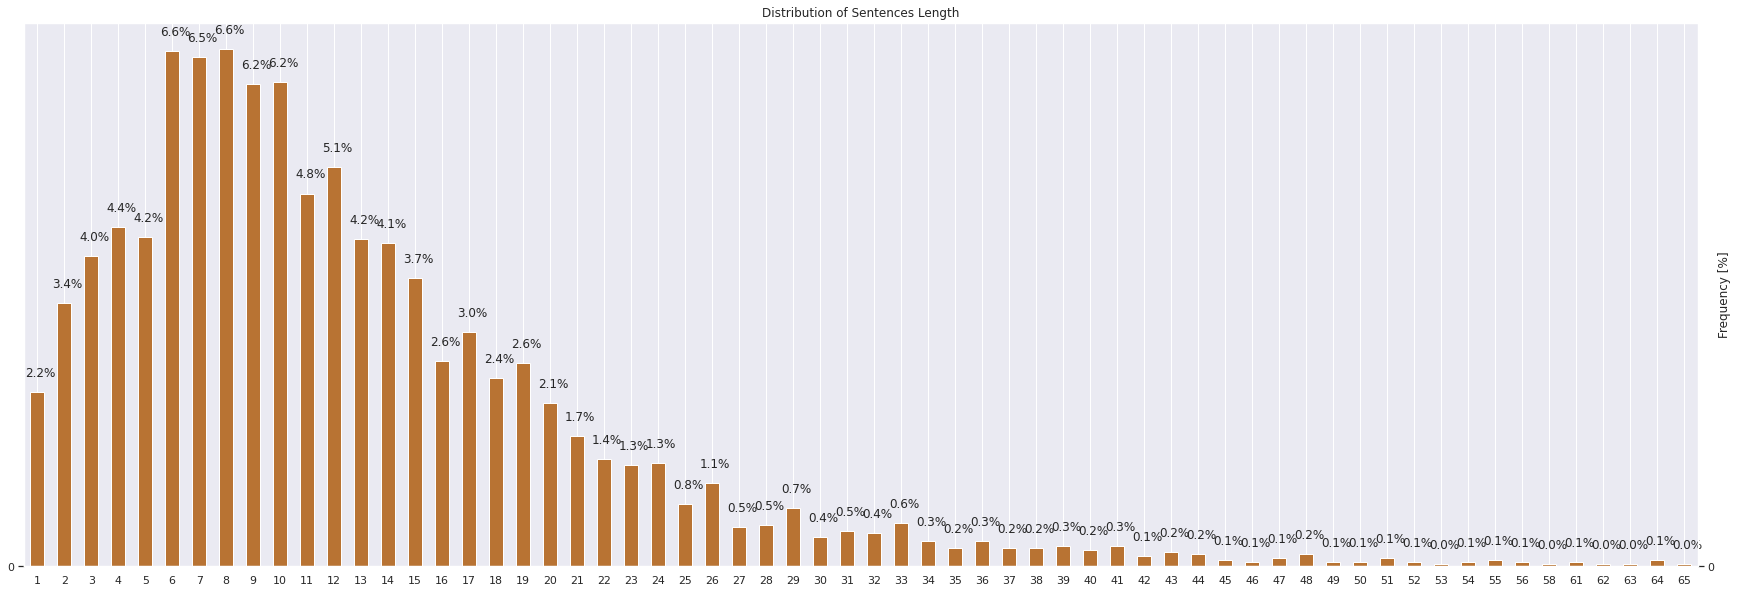

In [134]:

sns.set_theme(style="darkgrid")

plt.figure(figsize=(30,10))

QD_bar = (QD_data.sentencelength.value_counts()/len(QD_data)*100).sort_index().plot(kind="bar", rot=0, color = '#b87333')
QD_bar.set_yticks(np.arange(0, 10, 10))

QD_bar2 = QD_bar.twinx()
QD_bar2.set_yticks(np.arange(0, 10, 10)*len(QD_data)/100)

for i in QD_bar.patches:
    QD_bar.annotate('{:.1f}%'.format(i.get_height()), (i.get_x()-0.2, i.get_height()+0.2))

plt.title('Distribution of Sentences Length')
plt.xlabel('SentenceLength')
plt.ylabel('Frequency [%]')
plt.savefig("Distribution_of_Sentences_Length.png")

# **Confidence Intervals**

                         

*   The degree of inaccuracy or disparity between our sample mean and the 
population mean, confidence intervals are computed from an estimate of how far away our sample mean is from the actual population mean.
*   Confidence intervals provide us an upper and lower boundary around our sample mean, and we may be certain that we have caught the population mean if we stay inside this range.
*   The lower and upper bounds of our sample mean indicate the range of values in which our genuine population mean is most likely to fall.  
*   We may infer that the sampling distribution of the sample mean is normally distributed because we are working with bigger samples (n>30) and can instead employ the norm.interval() function. The scipy.stats library's  method.




                                                                                                                                                                                                               

                                                                                                                                                   



In [135]:
QD_confidence_interval = st.norm.interval(alpha=0.95, loc=np.mean(QD_data), scale=st.sem(QD_data))
print("Confidence interval generated using scipy.stats.norm.interval is", QD_confidence_interval)

Confidence interval generated using scipy.stats.norm.interval is (array([12.38150231]), array([12.96477428]))


# **Evaluation:**
The larger the confidence level, the wider the confidence interval.       

**Lower Bound Range**:  12.38150231                                                  
**Upper Bound Range**:  12.96477428                                                  
**Mean of Population**: 12.673138

# **Likelihood Normal Distribution** 
In data science and statistics, statistical inference and hypothesis testing relies heavily on the normal distribution.
This allows us to make inferences about the overall population even from relatively small samples — meaning from just a few observations, we can learn a great deal about the statistical characteristics of the overall population.

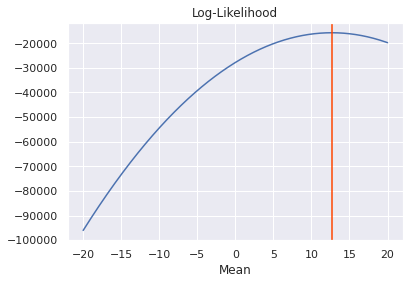

In [136]:
QD_X = np.linspace(-20, 20, 4000, endpoint=True)
QD_Y = []
for i in QD_X:
    QD_Y.append(np.log(st.norm.pdf(QD_data ,i,5)).sum())

plt.plot(QD_X,QD_Y)
plt.title(r'Log-Likelihood')
plt.xlabel(r'Mean')
plt.axvline(12.673138,color='orangered')
plt.savefig("likelihood_normal_distribution.png")
plt.show()

# **Evaluation**

The higher the blue line in the plot, the more likely it is that a number below it on the x-axis will be seen. It's worth noting that a number of 5 or fewer is quite unusual. That's because our normally distributed random variable has a standard deviation of 9, and 5 is significantly different from the mean (12.67).

Below results are identical:                                                     
**Log-Likelihood** : 12.66816704176044

In [137]:
print('Mean:', np.mean(QD_data))
print('Std Deviation:', np.std(QD_data))
QD_Y_MIN = QD_Y.index(max(QD_Y))
print('Mean from max log likelihood: ', QD_X[QD_Y_MIN])

Mean: sentencelength    12.673138
dtype: float64
Std Deviation: sentencelength    9.122822
dtype: float64
Mean from max log likelihood:  12.66816704176044


#  **MAXIMUM LIKELIHOOD ESTIMATION(MLE)**  <br>
Maximum likelihood estimation (MLE) includes generating a likelihood function for predicting the probability of detecting the data given the probability distribution and distribution parameters. This approach may be used to a variety of different distributions and parameters. <br>
**norm.rvs()** used for generating random numbers from the population.<br>
**norm.fit()** used for Parameter estimates for generic data.                                                                           <br>                              
The two parameters used to create the distribution are:                          
**loc**— The population's mean defines the distribution's centre, and a higher value results in a curve that is translated to the left.                        
**scale** — This parameter is simply standard deviation, which defines the curve's breadth, with a bigger value resulting in a shorter and broader curve and a lower value resulting in a lighter and taller curve.    <br>    

 **Calculating Maximum Likelihood Estimates**  
The formula for calculating the probability density of detecting a single data point x derived from a Gaussian distribution is:  

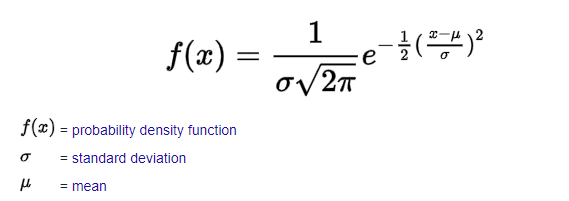

In [138]:
n = 3760
QD_Samples = stats.norm.rvs(loc=QD_Mean, scale=QD_Std_Dev, size=n) 

QD_MLE = stats.norm.fit(QD_Samples, fscale=QD_Std_Dev)[0]
print("The maximum likelihood estimate of the mean is", QD_MLE)

The maximum likelihood estimate of the mean is 12.706246888681406


# **Evaluation:**
**MLE** = 12.642439928781796

# **Poisson Distribution** <br>

Poisson distribution is used to summarize count-based data. Poisson describes the distribution of unusual occurrences. Each event is assumed to be self-contained from the others.
The Poisson distribution is used to predict how many times an event will occur over a certain length of time.

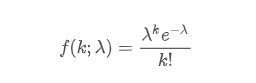                      
For events with an expected separation λ the Poisson distribution ***f(k;λ)***describes the probability of  events occurring within the observed interval λ . <br>

random.poisson() draw samples from a Poisson distribution. <br>
**Parameters**<br>
**lam:** The expected number of occurrences in a fixed-time interval must be greater than or equal to zero. Over the specified size, a sequence must be communicate.

**size:**
Shape of the output. If the shape is (m, n, k), for example, m * n * k samples are generated. 

**Returns**<br>
**out**: **ndarray or scalar**
Drawn samples from the parameterized Poisson distribution.

 

In [139]:
QD_random_dist = random.poisson(lam=10, size=3760)
print(QD_random_dist)

[ 8 13  7 ...  6 10 12]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


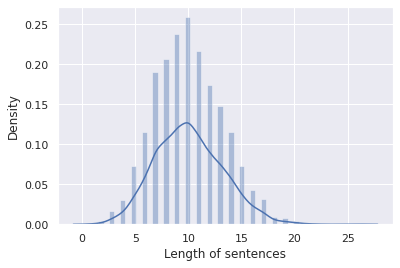

In [140]:
sns.distplot(QD_random_dist, kde=True)

plt.xlabel("Length of sentences")
plt.ylabel("Density")

plt.savefig("poisson_density.png")

# **Comparing Normal vs Poisson Distribution Density**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


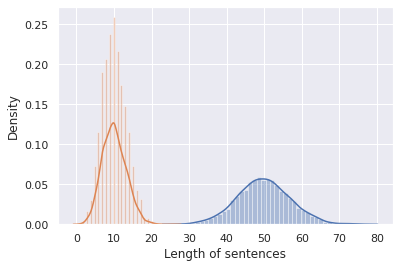

In [141]:
QD_Normal_dist = random.normal(loc=50, scale=7, size=3760)

sns.distplot(QD_Normal_dist, label='normal')
sns.distplot(QD_random_dist, label='poisson')

plt.xlabel("Length of sentences")
plt.ylabel("Density")
plt.savefig("normal_vs_poisson_distribution.png")

# **Implementing Poisson Regression** <br>

 Using the statsmodels GLM(Generalized linear model) class, employing the Poisson regression model on the data

In [142]:
Task1_poisson_training_results = sm.GLM(QD_data, QD_Ones, family=sm.families.Poisson()).fit()
print(Task1_poisson_training_results.summary())
print("Poisson regeression of AIC values",Task1_poisson_training_results.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:         sentencelength   No. Observations:                 3760
Model:                            GLM   Df Residuals:                     3759
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18602.
Date:                Tue, 04 Jan 2022   Deviance:                       21616.
Time:                        13:51:36   Pearson chi2:                 2.47e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5395      0.005    554.347      0.0

# **Poisson Distribution Summary**
 - Number of observations in the data are 3759 <br>
 - Log-likelihood of the poisson distribution = -18602 <br>
 - Parameters of the poisson distribution = 2.5395 <br>
 - Standard errors of the poisson distribution = 0.005 <br>

 - p-values of the poisson disribution = 0.0 <br>
 - AIC value of the poisson distribution =  37206.86706437265

In [143]:
print(Task1_poisson_training_results.mu)
print(len(Task1_poisson_training_results.mu))

[12.6731383 12.6731383 12.6731383 ... 12.6731383 12.6731383 12.6731383]
3760


In [144]:
print('Parameters: ', Task1_poisson_training_results.params)
print('Standard errors: ',Task1_poisson_training_results.bse)
print('P-values: ', Task1_poisson_training_results.pvalues)
print('AIC: ', Task1_poisson_training_results.aic)
print('Exp Parameters: ', np.exp(Task1_poisson_training_results.params))

Parameters:  const    2.539485
dtype: float64
Standard errors:  const    0.004581
dtype: float64
P-values:  const    0.0
dtype: float64
AIC:  37206.86706437265
Exp Parameters:  const    12.673138
dtype: float64


**Fitted Values are the predicted values of the model.**

In [145]:
QD_PD_fitted_values = Task1_poisson_training_results.fittedvalues
print(QD_PD_fitted_values)
QD_PD_fitted_valuesmax = QD_PD_fitted_values.max()
print(QD_PD_fitted_valuesmax)

0       12.673138
1       12.673138
2       12.673138
3       12.673138
4       12.673138
          ...    
3755    12.673138
3756    12.673138
3757    12.673138
3758    12.673138
3759    12.673138
Length: 3760, dtype: float64
12.673138297872336


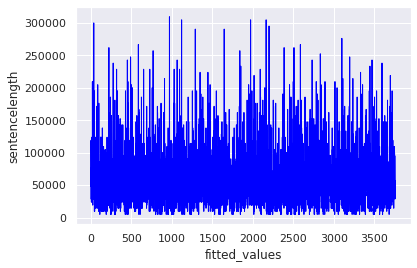

<Figure size 3000x100 with 0 Axes>

In [146]:
nbins = 10

fig, ax = plt.subplots()

plt.figure(figsize=(300,10),dpi=10)

QD_PD_Fitted_plot = ax.plot(QD_data* len(QD_PD_fitted_values) *  QD_PD_fitted_valuesmax/ nbins,'-r', lw=1,color="blue")

ax.set_xlabel("fitted_values")
ax.set_ylabel("sentencelength")
plt.savefig("fittedvalues_distribution.png")

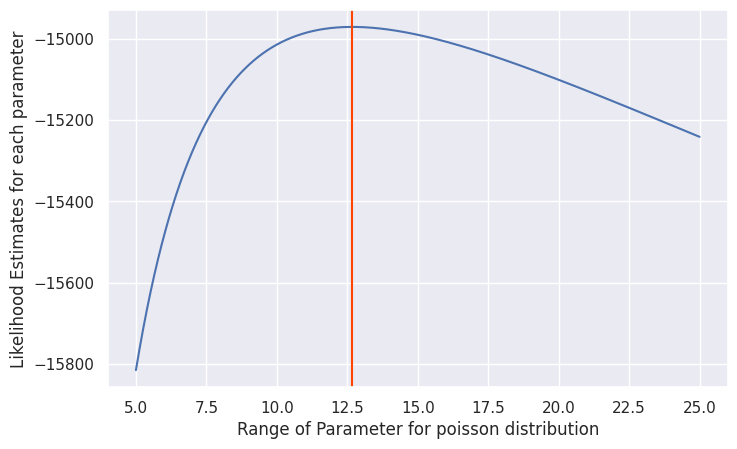

In [147]:
PD_Array = np.linspace(5,25,2000) 
PD_Empty_Arr = [] 
for mu in PD_Array: 
    PD_Empty_Arr.append(-funct(mu)) 
    
plt.figure(figsize=(8,5),dpi=100)
plt.plot(PD_Array,PD_Empty_Arr) 
plt.axvline(12.67314125,color='orangered') 
plt.xlabel("Range of Parameter for poisson distribution")
plt.ylabel("Likelihood Estimates for each parameter")
plt.savefig("Poisson Distribution Likelihood.png")


# **Implementation of Negative Binomial Distribution**

In [148]:
QD_NBD_training_results = sm.GLM(QD_data,QD_Ones,family=sm.families.NegativeBinomial()).fit()
print(QD_NBD_training_results.summary())
print("Negative binomial regeression of AIC values",QD_NBD_training_results.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:         sentencelength   No. Observations:                 3760
Model:                            GLM   Df Residuals:                     3759
Model Family:        NegativeBinomial   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13453.
Date:                Tue, 04 Jan 2022   Deviance:                       1714.6
Time:                        13:51:39   Pearson chi2:                 1.81e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5395      0.017    149.916      0.0

# **Negative Binomial Distribution Summary** 
 - Number of observations in the data are 3759 <br>
 - Log-likelihood of the poisson distribution = -13453 <br>
 - Parameters of the poisson distribution = 2.5395 <br>
 - Standard errors of the poisson distribution = 0.017 <br>

 - p-values of the poisson disribution = 0.0 <br>
 - AIC value of the poisson distribution =  26908.105528256812

In [149]:
print(QD_NBD_training_results.mu)
print(len(QD_NBD_training_results.mu))

[12.6731383 12.6731383 12.6731383 ... 12.6731383 12.6731383 12.6731383]
3760


In [150]:
print('Parameters: ', QD_NBD_training_results.params)
print('Standard errors: ',QD_NBD_training_results.bse)
print('P-values: ', QD_NBD_training_results.pvalues)
print('AIC: ', QD_NBD_training_results.aic)

Parameters:  const    2.539485
dtype: float64
Standard errors:  const    0.016939
dtype: float64
P-values:  const    0.0
dtype: float64
AIC:  26908.105528256812


In [151]:
alpha= QD_NBD_training_results.params[0]
alpha

2.539484658837065

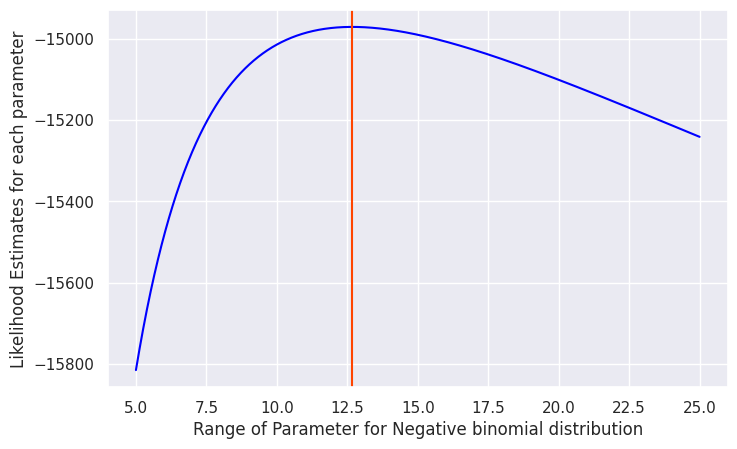

In [152]:
NBD_Array = np.linspace(5,25,2000) 

NBD_Empty_Arr = [] 
for mu in NBD_Array: 
    NBD_Empty_Arr.append(-funct(mu)) 

plt.figure(figsize=(8,5),dpi=100)
plt.plot(NBD_Array,NBD_Empty_Arr,color="blue") 
plt.axvline(12.67313603,color='orangered') 
plt.xlabel("Range of Parameter for Negative binomial distribution")
plt.ylabel("Likelihood Estimates for each parameter")
plt.savefig("Negative binomial Distribution Likelihood.png")


# **Comparing results of Poisson distribution vs Negative Binomial distribution**

To examine how well two models fit the data, the **Likelihood-ratio test** is performed. 

*   In our instance, the NB2 Log-likelihood is -13453, while the Poisson regression model has a Log-likelihood of -18602. 2 * (18602.2 - 13453) = 10298 is the LR test statistic. 
*   This number is significantly higher than the 5.412 significance threshold of 2(1) at the 1% level of significance.

* When tried to compare to the Poisson distribution, the trained NB2 regression model has a substantially superior goodness-of-fit on the data set, according to the LR test.

**The Pearson chi-squared statistic and the Deviance**

*  For the NB2 model, the reported values of Deviance and Pearson chi-squared are 330.99 and 310, respectively.
*  We search the value in the 2 table for p=0.05 and Degrees of freedom of residuals=165 to produce a quantitative evaluation of the goodness-of-fit at some confidence level, say 95 percent (p=0.05).
* The observed statistic — in this example, the Deviance or Pearson's chi-squared value returned in GLMResults — is compared to this Chi-Squared value. 
* The chi-squared result from a conventional Chi-Squared table at p=0.05 and DF Residuals = 165 is 195.973, which is less than the stated statistic of 330.99 and 310. 
* The Akaike information criterion (AIC) is a mathematical formula for measuring how well a model is statistically significant. The AIC value is a measurement of a model's ability to fit the data.
* The AIC number is a measure of how well a model suits the data. The smaller the value, the better. The negative binomial model has a lower AIC. As a consequence, it matches the data better than poisson. 
* As a result, although having a considerably better fit than the Poisson regression model, the NB2 regression model is still sub-optimal in this test.





**MAP inference or  Maximum a posteriori inference** <br>

---


Map inference is used to find the parameter value (single parameter estimate) that maximises the posterior distribution. MAP is similar to MLE, only it maximises the posterior rather than the probability. Below is the posterior distribution estimate in log form.

$\log p(\mu|x,\sigma) \propto \left(\sum_i \log p(x_i|\mu,\sigma)\right) + \log p(\mu)$



𝑝(𝜇|𝑥,𝜎) - Posterior probability of the parameters given the observed data.

𝑝(𝑥𝑖|𝜇,𝜎) - Likelihood

𝑝(𝜇) - prior

 
After analyzing the facts, posterior probability reveals how the likelihood has changed prior notions about the parameters.

To implement MAP inference on our data, which has a shape of 4.0 and a scale of 0.1, we use the Gamma distribution as a prior distribution. The Likelihood is derived using the Poisson distribution. The MAP inference is improved by inserting a prior to the likelihood (in log form) in order to boost the posterior density.

## **Posterior**

[0.00000000e+00 8.47184885e-05 6.52796880e-04 ... 4.34388886e-59
 4.18711138e-59 4.03599148e-59]


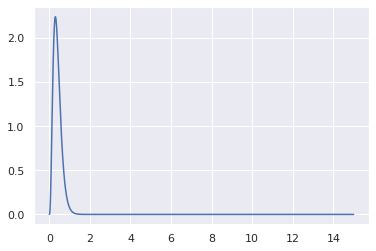

In [153]:
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt

posterior_X = np.linspace (0,15,4000) 

#calculate pdf of Gamma distribution for each x-value
posterior_Y = stats.gamma.pdf(posterior_X, a=4, scale=0.1)
print(posterior_Y)

#create plot of Gamma distribution
plt.plot(posterior_X, posterior_Y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Gamma Distribution')]

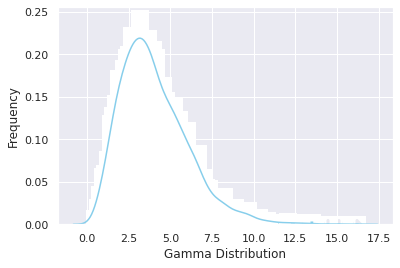

In [154]:
QD_data_gamma = gamma.rvs(a=4, size=3760)
QD_gamma_dist = sns.distplot(QD_data_gamma,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
QD_gamma_dist.set(xlabel='Gamma Distribution', ylabel='Frequency')

# **MAP Estimation Summary:**

- Maximum likelihood forecasting is the process of determining the MAP for a statistical model with uniform priors (MLE). <br>
- If the previous convictions are not consistent, the method for assessing the MAP stays the same. <br>
- It's important to remember that the MAP is only one part of the posterior. <br>
- The most crucial spot, it may be assumed, is where the posterior is strongly inclined. <br>


# **Task2**

# **Importing Libraries**

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import matplotlib.colors as matcolors
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_curve

from tabulate import tabulate

# **DATASET EXPLORATION**

In [156]:
data_df = pd.read_csv("https://drive.google.com/uc?export=download&id=19V6ak_50INPPKiIKj8sXBw0x_yP7ciY2")
labels_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1h2X8-KFHmPrBUU4D3uF4QK_cHqhHDKa3")

In [157]:
data_df.head()

,243.128,96.455,158.618,90.253,0.693,56.238,1.581,3.615,13.597,264.586,0.664,1.414,0,64.28,-0.084,3.074,42.669,1.867,0.031,72.877,2.121,376.41,46.248,-0.958,-0.444,42.759,-1.651,-1.445,157.638
0,139.751,74.028,111.619,44.266,2.119,104.723,-0.498,2.533,9.437,168.638,2.126,-1.042,0.619,31.997,1.481,1.614,68.028,-0.056,-2.655,20.147,0.447,252.698,36.798,0.269,-1.254,31.816,-1.849,0.664,68.614
1,116.217,73.136,59.239,101.850,0.625,85.539,2.979,1.922,28.049,202.636,1.966,0.577,0.000,20.894,-2.359,1.423,41.074,-0.807,0.289,68.144,1.816,271.485,82.453,2.066,-1.210,58.216,1.442,-2.288,140.669
2,64.544,0.099,28.945,341.418,2.390,358.936,-1.181,0.714,35.293,508.349,3.894,1.010,0.963,20.102,0.446,-2.483,78.270,-0.264,-2.408,243.099,-2.409,470.806,331.152,-1.693,0.615,41.742,0.697,1.083,409.977
3,32.281,67.393,26.006,29.088,1.330,108.191,-0.362,0.846,48.389,152.087,1.252,-1.084,0.880,28.195,-0.076,2.496,35.312,0.046,1.659,32.186,-1.421,244.220,48.198,0.949,1.517,40.382,-0.382,-2.029,88.580
4,135.018,97.900,106.636,77.614,2.530,239.596,-1.207,2.698,66.300,320.620,5.094,0.426,0.419,22.294,1.434,1.405,113.555,0.552,-1.145,21.931,1.605,257.142,96.266,0.638,2.543,45.109,-1.892,-1.956,184.771


In [158]:
labels_df.head()

,0
0,0
1,0
2,0
3,0
4,1


# **Data Visualization**

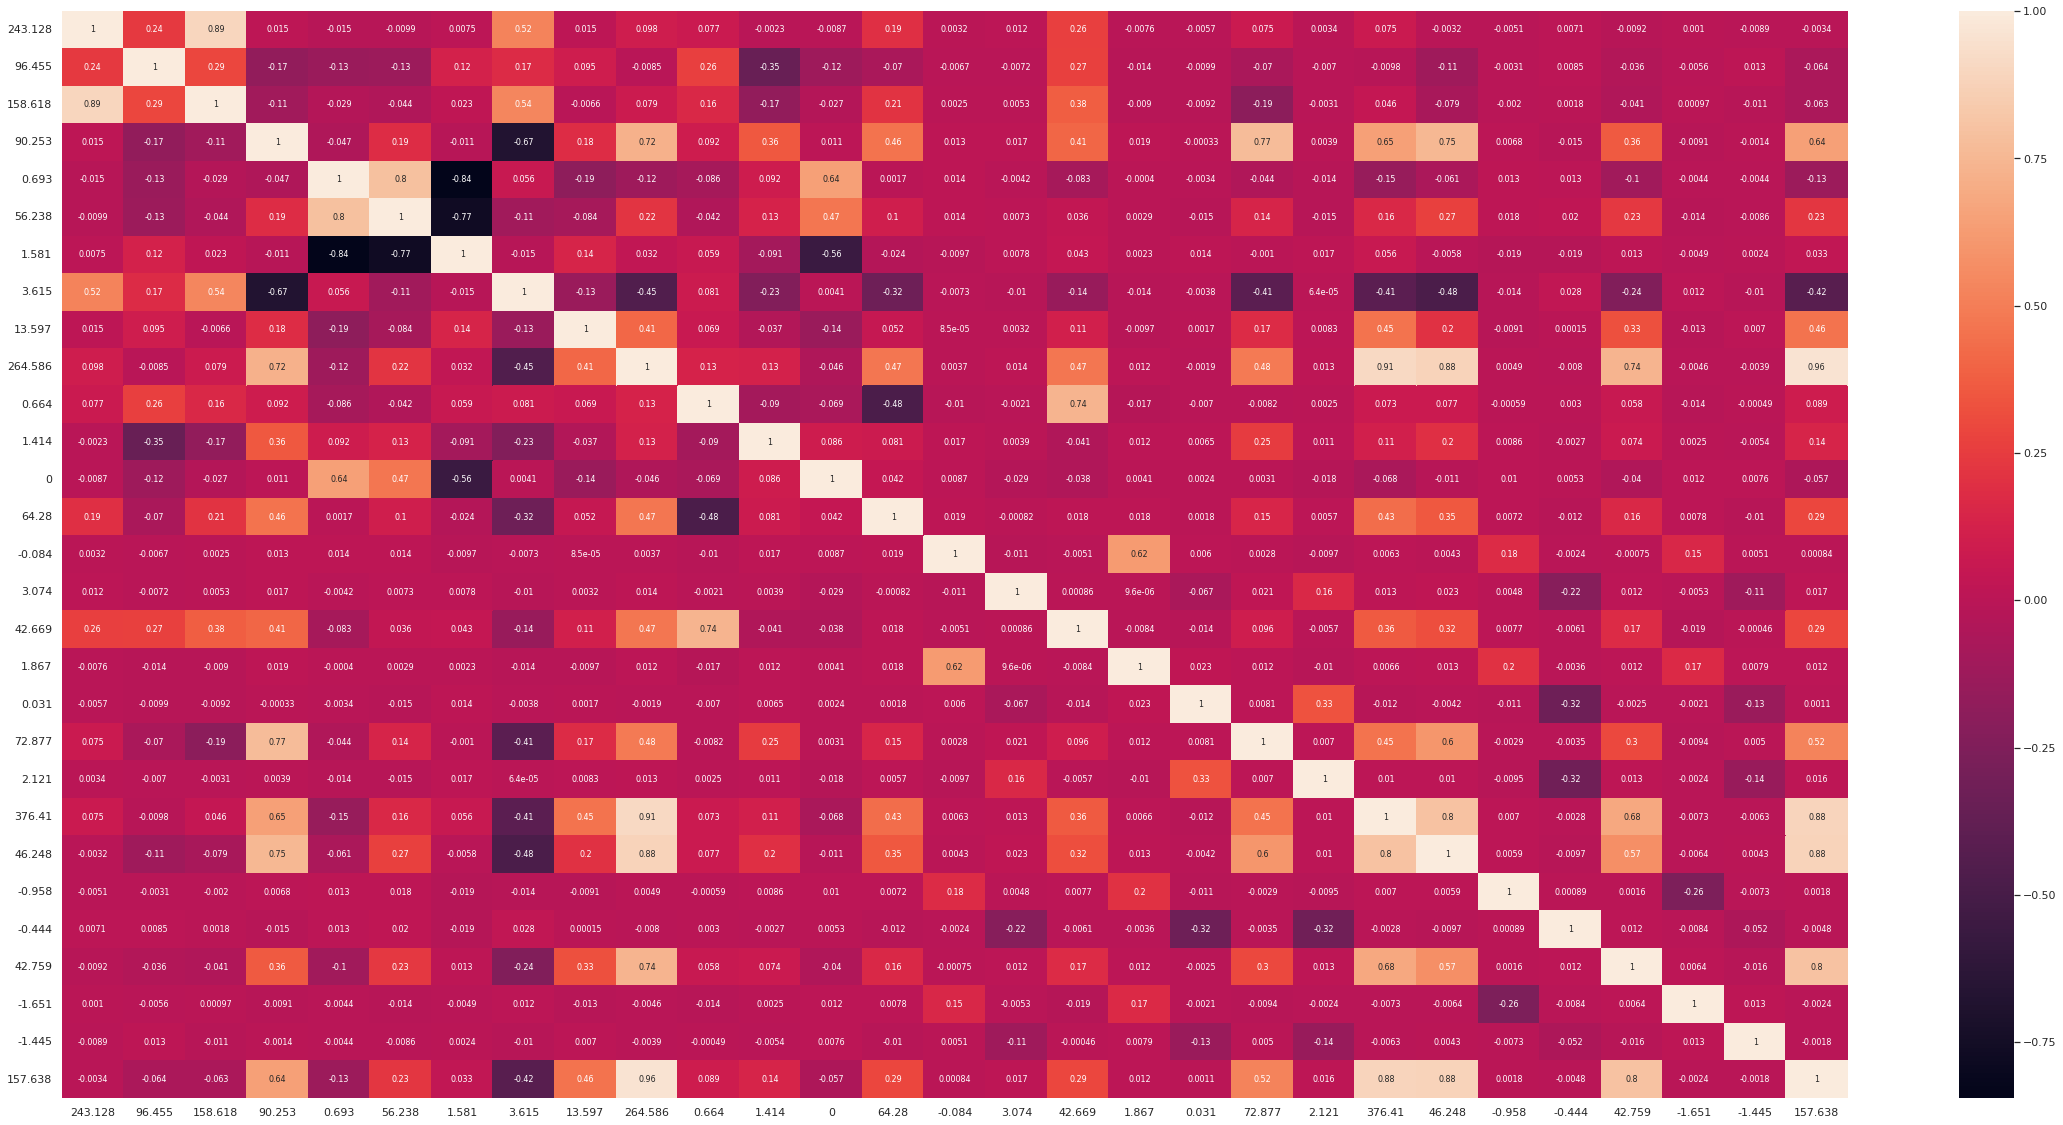

In [159]:
plt.figure(figsize = (40,20))

Task2_Corr = data_df.corr()
sns.heatmap(Task2_Corr, annot_kws={"size": 8},annot = True)

plt.savefig('Atlas_heatmap.png')

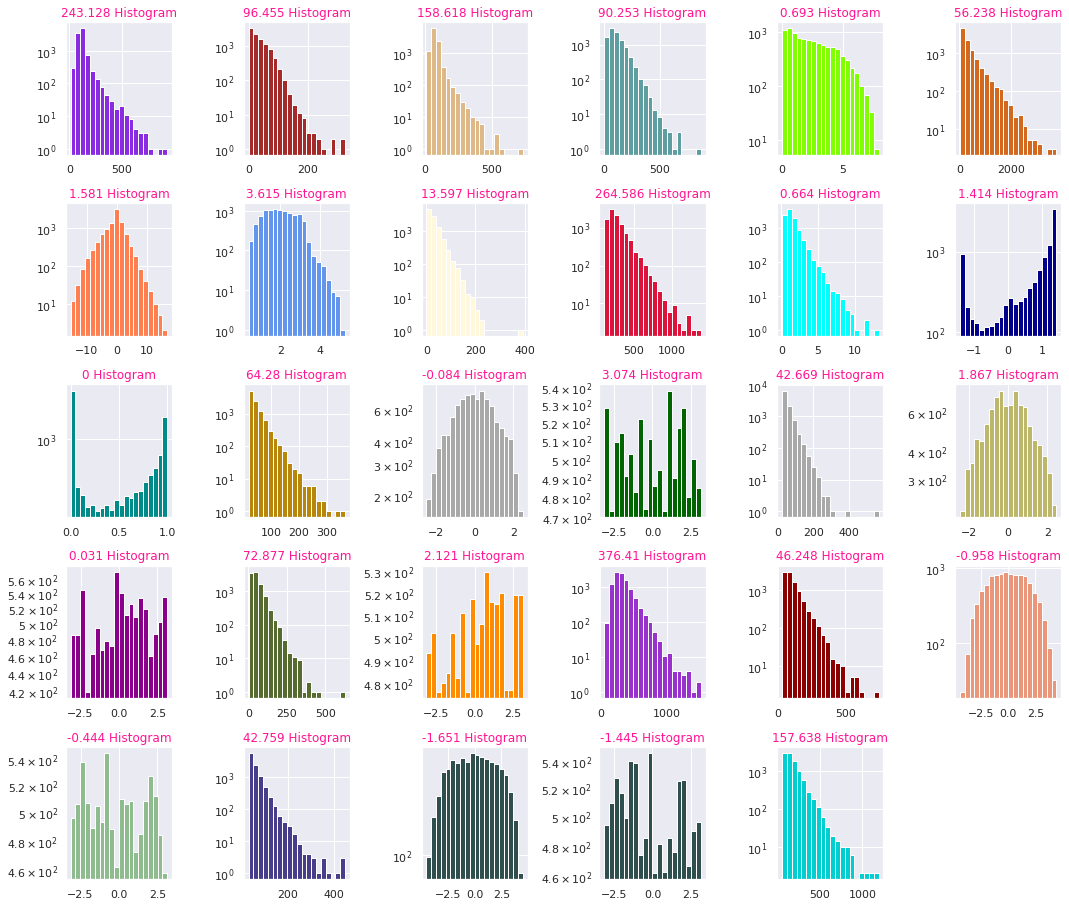

In [160]:
plot_colors = list(matcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(data, parm, row_data, col_data):
    Task2_img = plt.figure(figsize=(15,15))
    for i, parm in enumerate(parm):
        Task2_hist = Task2_img.add_subplot(row_data,col_data,i+1)
        data[parm].hist(bins=20,ax=Task2_hist,facecolor=plot_colors[i])
        Task2_hist.set_title(parm+" Histogram",color=plot_colors[30])
        Task2_hist.set_yscale('log')
    Task2_img.tight_layout() 
    plt.savefig('Atlas_Histograms.png')
    plt.show()
draw_histograms(data_df,data_df.columns,6,6)

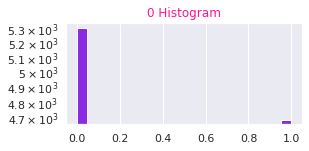

In [161]:
draw_histograms(labels_df,labels_df.columns,8,4)

# **Splitting Dataset into Train and Test**

While machine learning techniques are used to generate predictions on data which was not used to train the model, the train-test split process is used to assess their performance.

**Train Dataset:** to fit the machine learning model.

**Test Dataset:** Used to evaluate how well a machine learning model performs.

In [162]:
X_data_train, X_data_test, y_labels_train, y_labels_test = train_test_split(data_df, labels_df, test_size = 0.30, random_state = 0)

# **Feature scaling**

Feature scaling is an approach for normalising a set of observations or input features.

We're employing Standardization to normalize data that has a Gaussian distribution.

In [163]:
Task2_SC = StandardScaler()
Task2_X_train = Task2_SC.fit_transform(X_data_train)
Task2_X_test = Task2_SC.transform(X_data_test)

# **Naive Bayes Implementation**

The Bayes theorem is used to create the Naive Bayes classification method.

To create a simple model effectively, make sure the data has a Gaussian distribution without variance among characteristics. This model may be simply fit by computing the mean difference of the data for each term, which is all that is expected to represent an estimation.

The sklearn.naive bayes.GaussianNB estimator in Scikit-Learn implements this procedure:

In [164]:
NBModel = GaussianNB()
NBModel.fit(Task2_X_train, y_labels_train.values.ravel())

GaussianNB()

**Predicting the fitted Naive bayes model**

In [165]:
Task2_y_NB_pred  =  NBModel.predict(Task2_X_test)

In [166]:
print(Task2_y_NB_pred)

[0 0 1 ... 1 0 0]


In [167]:
print(y_labels_test)

      0
9446  1
898   0
2398  0
5906  0
2343  0
...  ..
4004  0
9309  1
9306  1
9692  0
5233  0

[3000 rows x 1 columns]


# **Plotting Confusion Matrix**

Significant predictive insights such as accuracy,recall, specificity, and precision are represented using confusion matrices. 

Confusion matrices are essential because it allows you to compare results such as True Positives, True Negatives, False Positives, and False Negatives in a concise format.

**"true positive"** for event values that were successfully forecasted.

**"False positive"** for event values that were mistakenly forecasted.

**"true negative"** used for successfully forecasted no-event values.

**"False negative"** for no-event values that were mistakenly forecasted.

[[1160  449]
 [ 305 1086]]


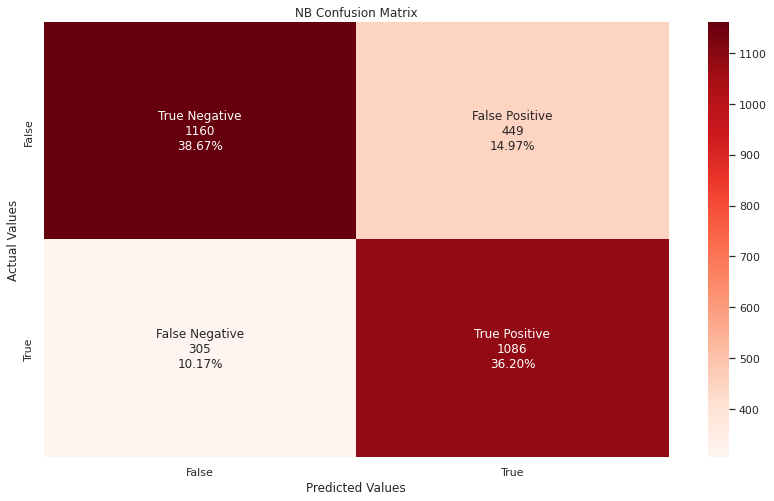

In [168]:
Task2_NB_ConfMatrx = confusion_matrix(y_labels_test, Task2_y_NB_pred)
plt.figure(figsize=(14,8))


NB_CM_GrpNames = ['True Negative','False Positive','False Negative','True Positive']

NB_CM_GrpCounts = ["{0:0.0f}".format(value) for value in Task2_NB_ConfMatrx.flatten()]

NB_CM_GrpPercentages = ["{0:.2%}".format(value) for value in Task2_NB_ConfMatrx.flatten()/np.sum(Task2_NB_ConfMatrx)]

NB_CM_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(NB_CM_GrpNames, NB_CM_GrpCounts, NB_CM_GrpPercentages)]
NB_CM_labels = np.asarray(NB_CM_labels).reshape(2,2)

NB_heatmap = sns.heatmap(Task2_NB_ConfMatrx, annot=NB_CM_labels,fmt='', cmap=plt.cm.Reds)
plt.title("NB Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
NB_heatmap.xaxis.set_ticklabels(['False','True'])
NB_heatmap.yaxis.set_ticklabels(['False','True'])
plt.savefig('Task2_NB_Confusion_Matrix.png')

print(Task2_NB_ConfMatrx)

According to the aforementioned result, we have:



*   Correct estimations total **1160+1086=2246**.
*   There are **449+305=754** forecasts that are inaccurate.







# **Classification Report for Naive Bayes**

Summary of model evaluating factors as below

In [169]:
Task2_NB_Summary = classification_report(y_labels_test, Task2_y_NB_pred)
print(Task2_NB_Summary)

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1609
           1       0.71      0.78      0.74      1391

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



# **Implementation of Logistic Regression**

In [170]:
LogReg_Model = LogisticRegression(solver='lbfgs',max_iter=5000)

In [171]:
LogReg_Model.fit(Task2_X_train, y_labels_train.values.ravel())

LogisticRegression(max_iter=5000)

In [172]:
Task2_y_LR_pred = LogReg_Model.predict(Task2_X_test)

In [173]:
print(Task2_y_LR_pred)

[1 0 1 ... 0 0 0]


In [174]:
print(y_labels_test)

      0
9446  1
898   0
2398  0
5906  0
2343  0
...  ..
4004  0
9309  1
9306  1
9692  0
5233  0

[3000 rows x 1 columns]



#**Plotting Confusion Matrix**

Significant predictive insights such as accuracy,recall, specificity, and precision are represented using confusion matrices. 

Confusion matrices are essential because it allows you to compare results such as True Positives, True Negatives, False Positives, and False Negatives in a concise format.

**"true positive"** for event values that were successfully forecasted.

**"False positive"** for event values that were mistakenly forecasted.

**"true negative"** used for successfully forecasted no-event values.

**"False negative"** for no-event values that were mistakenly forecasted.

[[1222  387]
 [ 443  948]]


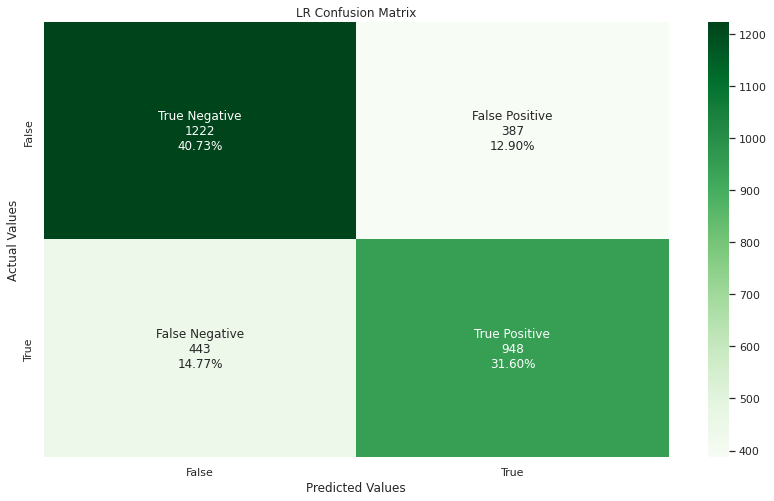

In [175]:
Task2_LR_ConfMatrx = confusion_matrix(y_labels_test, Task2_y_LR_pred)
plt.figure(figsize=(14,8))


LR_CM_GrpNames = ['True Negative','False Positive','False Negative','True Positive']

LR_CM_GrpCounts = ["{0:0.0f}".format(value) for value in Task2_LR_ConfMatrx.flatten()]

LR_CM_GrpPercentages = ["{0:.2%}".format(value) for value in Task2_LR_ConfMatrx.flatten()/np.sum(Task2_LR_ConfMatrx)]

LR_CM_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(LR_CM_GrpNames, LR_CM_GrpCounts, LR_CM_GrpPercentages)]
LR_CM_labels = np.asarray(LR_CM_labels).reshape(2,2)

LR_heatmap = sns.heatmap(Task2_LR_ConfMatrx, annot=LR_CM_labels,fmt='', cmap=plt.cm.Greens)
plt.title("LR Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
LR_heatmap.xaxis.set_ticklabels(['False','True'])
LR_heatmap.yaxis.set_ticklabels(['False','True'])
plt.savefig('confusion_matrix.png')

print(Task2_LR_ConfMatrx)

According to the aforementioned result, we have:



*   Correct estimations total **1222+948=2170**.
*   There are **443+387=830** forecasts that are inaccurate.

# **Classification Report Summary for Logistic Regression**

In [176]:
Task2_LR_Summary = classification_report(y_labels_test, Task2_y_LR_pred)
print(Task2_LR_Summary)

              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1609
           1       0.71      0.68      0.70      1391

    accuracy                           0.72      3000
   macro avg       0.72      0.72      0.72      3000
weighted avg       0.72      0.72      0.72      3000



**Accuracy**

Accuracy is how close a measure value is to the true value. <br>
  ![image.png](https://drive.google.com/uc?export=download&id=1hQWMhaJgy1_LptnuB3SaBWA-FQl1NdQb)
---
**Precision**

Precision is how close measure values are to each other, basically how many decimal places are at the end of a given measurement<br>
    ![image.png](https://drive.google.com/uc?export=download&id=1Y6FHvewxdAzUyMh_6vqkJ8Y22ZkbsvlL)

---
**Recall**

The ability of a classification model to identify all relevant instances<br>
   ![image.png](https://drive.google.com/uc?export=download&id=1pDRLD0ps8kba6tDUCnsOraAlK8dGTiwQ)  
---
**F1 score**

The single metric that combines recall and precision using the harmonic mean<br>
   ![image.png](https://drive.google.com/uc?export=download&id=1zrSZwer88kHewwNtXZ2tytn7dMhQshsR)
---
**AUC Score**

The Area Under the Curve (AUC) is a representation of the ROC curve that measures a classifier's ability to discriminate among groupings.

The AUC indicates how well the model identifies between positive and negative classes. The greater the AUC, the better the model.

---
**ROC curve**

The True Positive Rate (TPR) vs. False Positive Rate (FPR) at various categorization levels is plotted on a ROC curve. As the classification threshold is lowered, more items are classified as positive, resulting in an increase in both False Positives and True Positives.

A ROC curve is a standard tool to analyze models that evaluate probability for two groups.

In [177]:
NB_Accuracy = metrics.accuracy_score(y_labels_test,Task2_y_NB_pred)
LR_Accuracy = metrics.accuracy_score(y_labels_test, Task2_y_LR_pred)

NB_Precision = metrics.precision_score(y_labels_test,Task2_y_NB_pred)
LR_Precision = metrics.precision_score(y_labels_test, Task2_y_LR_pred)

NB_Recall = metrics.recall_score(y_labels_test,Task2_y_NB_pred)
LR_Recall = metrics.recall_score(y_labels_test, Task2_y_LR_pred)

NB_F1_Score = metrics.f1_score(y_labels_test,Task2_y_NB_pred)
LR_F1_Score = metrics.f1_score(y_labels_test, Task2_y_LR_pred)

NB_AUC = roc_auc_score(y_labels_test,Task2_y_NB_pred)
LR_AUC = roc_auc_score(y_labels_test, Task2_y_LR_pred)


# **Methods of Validating both Models**

In [178]:
Task2_Summary = [
[1, 'Accuracy_score', NB_Accuracy, LR_Accuracy],
[2, 'Precision_score', NB_Precision, LR_Precision],
[3, 'Recall_score', NB_Recall, LR_Recall],
[4, 'F1score_score', NB_F1_Score, LR_F1_Score],
[5, 'Roc_Auc_Score', NB_AUC, LR_AUC]
]

print(tabulate(Task2_Summary, headers=["Methods of Validation", "Naive Bayes", "Logistic Regression"]))

    Methods of Validation      Naive Bayes    Logistic Regression
--  -----------------------  -------------  ---------------------
 1  Accuracy_score                0.748667               0.723333
 2  Precision_score               0.707492               0.710112
 3  Recall_score                  0.780733               0.681524
 4  F1score_score                 0.74231                0.695525
 5  Roc_Auc_Score                 0.750839               0.720501


# **Plotting AUROC**

Naive Bayes: ROC AUC=0.75
Logistic Regression: ROC AUC=0.72


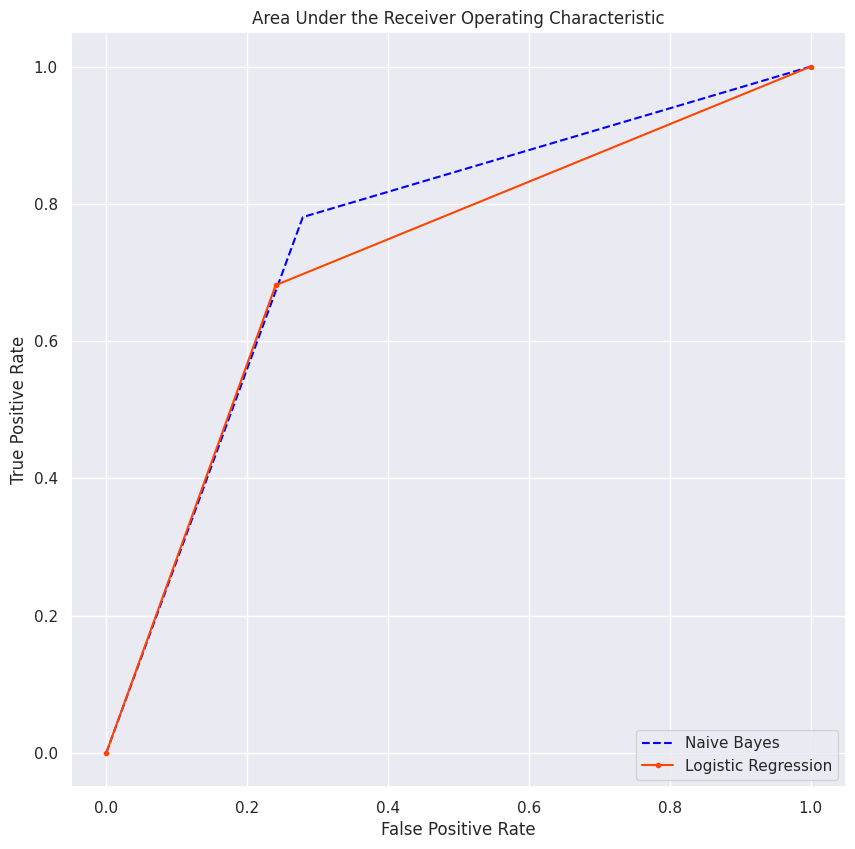

In [179]:
FPR_NB, TPR_NB, _ = metrics.roc_curve(y_labels_test,Task2_y_NB_pred)
FPR_LR, TPR_LR, _ = metrics.roc_curve(y_labels_test, Task2_y_LR_pred)

plt.figure(figsize=(10,10),dpi=100)

plt.plot(FPR_NB, TPR_NB, linestyle='--', label='Naive Bayes',color="blue")
plt.plot(FPR_LR, TPR_LR, marker='.', label='Logistic Regression',color="orangered")
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc="lower right")
plt.title('Area Under the Receiver Operating Characteristic')

# show the plot
print('Naive Bayes: ROC AUC=%.2f' % (NB_AUC))
print('Logistic Regression: ROC AUC=%.2f' % (LR_AUC))


The Naive Bayes is represented by the blue line. The y-axis in the ROC curve above represents true positive rate, while the x-axis represents false positive rate. 

The AUC for the Naive Bayes ROC curve is higher than that for the Logistic Regression ROC curve. 

Therefore, we can say that Naive Bayes did a better job of classifying the positive class in the dataset.

# **Plotting Precision-Recall**

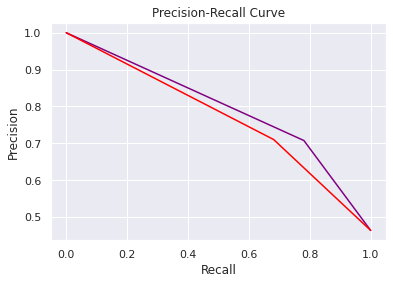

In [181]:
NB_Precision, NB_Recall, NB_Thresholds = precision_recall_curve(y_labels_test,Task2_y_NB_pred)
LR_Precision, LR_Recall, LR_Thresholds = precision_recall_curve(y_labels_test,Task2_y_LR_pred)

fig, ax = plt.subplots()
ax.plot(NB_Recall, NB_Precision, color='purple')
ax.plot(LR_Recall, LR_Precision, color='red')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

The recall is shown on the x-axis, while the precision is shown on the y-axis for sets of rules.

It's important to note that as recall rises, precision falls. 
To improve our model's recall, we must minimize its precision, and conversely.

# **CONCLUSION**

   



   ## **Accuracy** <br>

   - The Accuracy score of **NAIVE BAYES** is **74.75** <br>
   - The Accuracy score of **LOGISTIC REGRESSION** is **72.00** <br>
   - The Accuracy score of **NAIVE BAYES** is greater than **LOGISTIC REGRESSION**. <br>

## **Precision** <br>
 
   - The Precision score of **NAIVE BAYES** is **70.74** <br>
   - The Precision score of **LOGISTIC REGRESSION** is **71.01** <br>
   - The Precision score of **NAIVE BAYES** and **LOGISTIC REGRESSION** are approximately in the same range or equal.<br>

## **Recall** <br>
 
   - The Recall score of **NAIVE BAYES** is **78.07** <br>
   - The Recall score of **LOGISTIC REGRESSION** is **68.15** <br>
   - The Recall Score of **NAIVE BAYES** is greater than **LOGISTIC REGRESSION** <br>
 
## **f1score** <br>
   
   - The f1score of **NAIVE BAYES** is **74.23** <br>
   - The f1score of **LOGISTIC REGRESSION** is **69.55** <br>
   - The f1score of **NAIVE BAYES** is greater than **LOGISTIC REGRESSION** <br>
 
## **ROC_AUC_SCORE**
 
   - The roc_auc_score of **NAIVE BAYES** is **75.08** <br>
   - The roc_auc_score of **LOGISTIC REGRESSION** is **72.05** <br>
   - The roc_auc_score of **NAIVE BAYES** is greater than **LOGISTIC REGRESSION** <br>
 
 **We may infer that NAIVE BAYES is the best-fit model based on the above scoring and validation techniques.**
  



# **The End!**